In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
plt.style.use('seaborn-ticks')

### Load Dataset

In [7]:
data = pd.read_excel('.\data\\LeadData_Customer.csv', index_col='CustomerNo')
# equip = pd.read_csv()

### Compute and Plot Correlation Heatmap

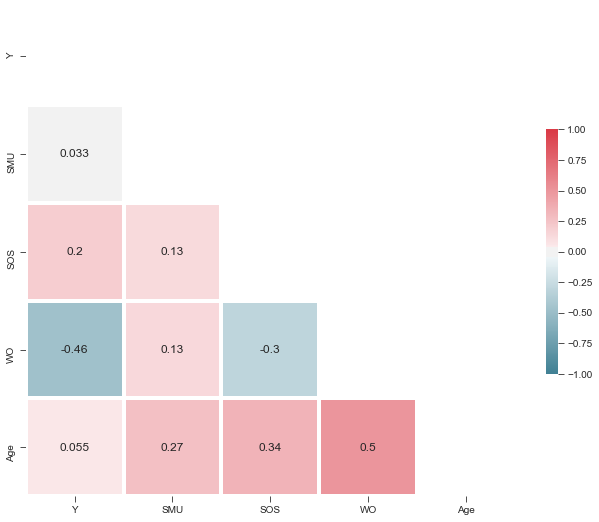

In [11]:
data = data # change it to your dataframe name, e.g. data = customers or data = equip,

# Compute the correlation matrix
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

heatmap = sns.heatmap(corr_matrix, mask=mask, cmap=cmap,
                      square=True, linewidths=3,
                      cbar_kws = {'shrink': .5},
                      vmin=-1, vmax=1,
                      annot=True, annot_kws = {'size': 12})

# add the column names as labels
ax.set_yticklabels(corr_matrix.columns)
ax.set_xticklabels(corr_matrix.columns)

plt.show()

In [17]:
# get sorted correlation
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_sorted_corr(df):
    crr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    crr = crr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return crr

get_sorted_corr(data)

WO   Age    0.500783
Y    WO     0.464635
SOS  Age    0.337762
     WO     0.304110
SMU  Age    0.270277
Y    SOS    0.200803
SMU  WO     0.133179
     SOS    0.127464
Y    Age    0.054932
     SMU    0.032877
dtype: float64

### Plot Pairplot for Univariant Distribution & Bivariant Scatter Plot

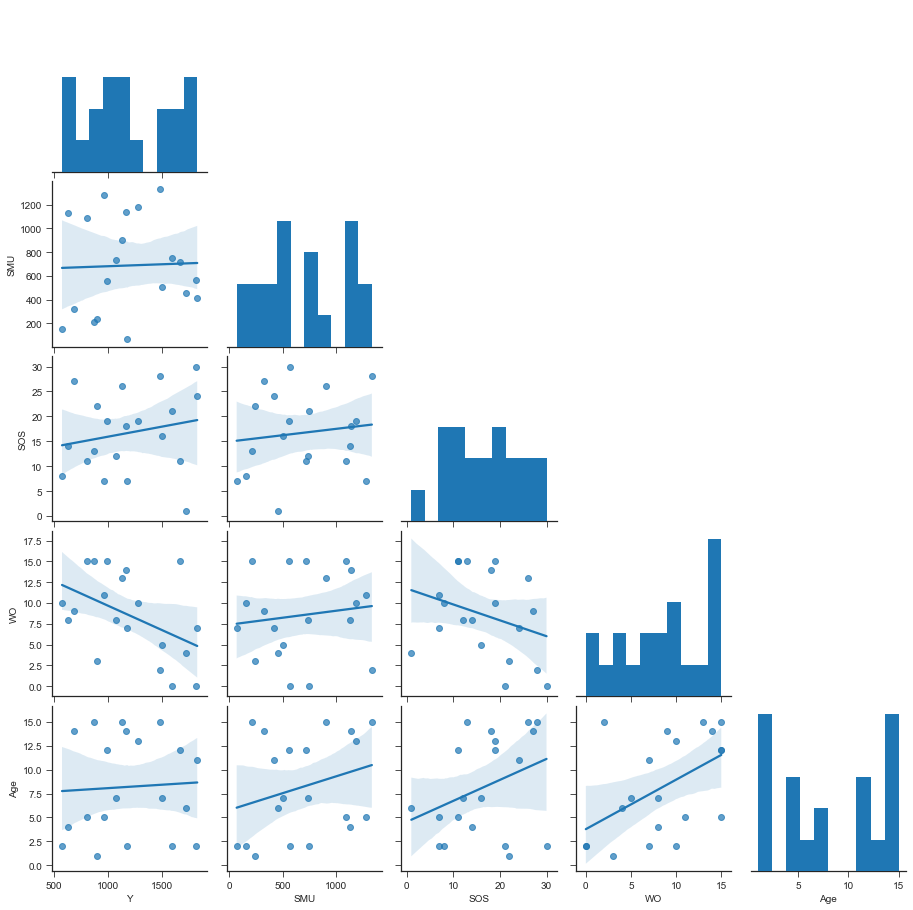

In [16]:
data = data # change this to your dataframe name, if you need to drop some columns,
# use the .drop method, e.g. data = customers.drop(columns=['CustomerNo', 'Y'])

sns.pairplot(data, kind='reg', diag_kind='hist', corner=True,
             height=2.5, aspect=1,
             plot_kws={'scatter_kws': {'alpha': 0.7}})
plt.show()

### Fit OLS Model

In [57]:
y = data['Y'] # change to your dataframe's dependant variable
X = data.drop(columns=['Y'])  # change to your dataframe's dependant variable

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              19.30
Date:                Sun, 12 Apr 2020   Prob (F-statistic):                    5.75e-06
Time:                        00:19:23   Log-Likelihood:                         -153.45
No. Observations:                  20   AIC:                                      314.9
Df Residuals:                      16   BIC:                                      318.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------